<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module3/optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підбір гіперпараметрів

Підбір гіперпараметрів - це **необхідний крок** в машинному навчанні, який може **істотно вплинути** на продуктивність вашої моделі. Цей гайд допоможе вам
зрозуміти основи підбору гіперпараметрів, а також дасть **більш детальну інформацію**
про ключові аспекти цього процесу:



# Недонавчання та перенавчання

## Недонавчання

* Виникає, коли модель **не може вивчити базові закономірності** в даних.
* В результаті модель **погано генерує прогнози** на нових даних.
* **Ознаки недонавчання:**
    * Низька точність на тренувальному та тестовому наборах даних
    * Велика різниця в продуктивності на тренувальному та тестовому наборах
* **Як виправити недонавчання:**
    * Збільшити складність моделі (наприклад, додати більше нейронів в нейронну мережу)
    * Збільшити обсяг даних для навчання
    * Зменшити регуляризацію



## Перенавчання

* Виникає, коли модель **занадто добре запам'ятовує тренувальні дані**,
    включаючи шум, і **не може добре працювати** з новими даними.
* **Ознаки перенавчання:**
    * Висока точність на тренувальному наборі даних, але низька на тестовому
    * Збільшення продуктивності при зменшенні складності моделі
* **Як виправити перенавчання:**
    * Зменшити складність моделі (наприклад, видалити нейрони з нейронної мережі)
    * Збільшити регуляризацію
    * Використовувати dropout
    * Застосувати ранню зупинку

![](https://www.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1705396624275.svg)

# Гіперпараметри vs параметри

## Гіперпараметри

* **Конфігурують модель навчання**,
    наприклад, швидкість навчання, кількість дерев, розмір пакету.
* **Їх не навчають з даних.**
* **Впливають на процес навчання та загальну продуктивність моделі.**
* **Приклад:** глибина дерева, Кількість листків, тощо



## Параметри

* **Навчаються з даних**,
    наприклад, вузли дерева
* **Оновлюються під час тренування моделі.**
* **Впливають на прогнози, які робить модель.**

![](https://miro.medium.com/v2/resize:fit:3076/1*FIIGhzbuTo2vI62mFcbMTg.png)

# Як обрати найкращі гіперпараметри?

## Ручний підбір

* **Виберіть набір гіперпараметрів**,
    навчіть модель і оцініть її продуктивність.
* **Повторіть процес** з іншими наборами гіперпараметрів,
    поки не знайдете найкращий.
* **Переваги:**
    * Не потребує додаткових інструментів
    * Дає розуміння впливу кожного гіперпараметра
* **Недоліки:**
    * Може бути трудомістким
    * Не гарантує знаходження оптимальних значень



## Пошук сітки

* **Систематично перевірте всі можливі комбінації значень гіперпараметрів.**
* **Переваги:**
    * Гарантує знаходження кращих гіперпараметрів
* **Недоліки:**
    * Може бути дуже обчислювально витратним
    * Не гнучкий

![](https://miro.medium.com/v2/resize:fit:612/0*QKZG5I3autl1HvlY.png)

## Методи байєзійської оптимізації

* **Використовуйте метод, такий як Optuna,
    для ефективного пошуку оптимальних значень гіперпараметрів.**
* **Переваги:**
    * Ефективно шукає оптимальні гіперпараметри
    * Автоматично зупиняє пошук, коли знаходить хороші результати
    * Може використовуватися з різними моделями машинного навчання
* **Недоліки:**
    * Може бути складним для початківців
    * Потребує базових знань статистики

# Інсталяція модуля

In [81]:
!pip install -q optuna

# Дані
Ціни на діаманти

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import lightgbm as lgb
import optuna

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/AmesHousing.csv",
                 index_col=0)

In [84]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [85]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Побудова моделі

## Поділ даних

In [86]:
y = df['SalePrice']
X = df.drop(columns='SalePrice')

# для роботи з lgbm потрібно змінити тип даних object на category
cat_columns = X.select_dtypes(include="object").columns
X[cat_columns] = X[cat_columns].astype('category')

## train, val та test data

Під час пошуку гіперпараметрів за допомогою Optuna використання трьох наборів даних - train, val та test -
є **необхідною умовою** для отримання **точних та надійних результатів**. Ось чому:

**1. Train data:**

* Використовується для **навчання моделі**.
* Містить дані, на яких модель буде **вивчати закономірності**.
* **Не повинне використовуватися** для оцінки продуктивності моделі
    під час пошуку гіперпараметрів, адже модель
    може просто запам'ятати
    ці дані,
    що призведе до перенавчання.

**2. Val data:**

* Використовується для **оцінки продуктивності моделі**
    під час пошуку гіперпараметрів.
* **Не повинне використовуватися** для
    навчання моделі.
* Дозволяє **моделювати процес**
    узагальнення на нові дані.
* Забезпечує **більш об'єктивну оцінку**
    продуктивності моделі,
    ніж оцінка на тренувальному наборі.

**3. Test data:**

* Використовується для **оцінки остаточної продуктивності моделі**
    після вибору найкращих гіперпараметрів.
* **Не використовується** ні для навчання, ні
    для налаштування гіперпараметрів.
* Забезпечує **найточнішу оцінку**
    продуктивності моделі
    на **незалежних** даних.

**Важливо:**

* Розмір та розподіл даних
    в **train, val та test**
    наборах
    **повинні бути подібними**.
* **Val data**
    **не повинне**
    **перетинатися**
    з **test data**.

**Використання трьох наборів даних**
дозволяє Optuna:

* **Уникнути перенавчання**
    та отримати
    **точні оцінки**
    продуктивності моделі.
* **Об'єктивно порівняти**
    різні набори гіперпараметрів.
* **Вибрати найкращі гіперпараметри**,
    які
    **узагальнюються**
    на нові дані.





In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.8,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} samples \t {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} samples \t {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} samples \t {round(X_val.shape[0] / X.shape[0] * 100)}%')

Train: 1875 samples 	 64%
Test:  586 samples 	 20%
Val:   469 samples 	 16%


## Створення Pipeline

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [89]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ])  # можна не кодувати категоріальні дані

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index([], dtype='object'))])

# Попередня обробка даних

Оскільки ми користуємось новою бібліотекою, то нам потрібно поередньо натренувати `preprocessor` та обробити дані

In [90]:
# навчання препроцесора
X_train = preprocessor.fit_transform(X_train)

# обробка даних
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Optuna

## Функція objective

Функція `objective` - це ключовий компонент вашого коду, де ви:

1. **Визначаєте модель LightGBMRegressor:**
    - Створюєте екземпляр `LightGBMRegressor` з бажаними параметрами.
2. **Навчаєте модель на тренувальному наборі даних:**
    - Використовуєте метод `fit` для навчання моделі на ваших тренувальних даних.
3. **Оцінюєте модель на тестовому наборі даних:**
    - Використовуєте метод `predict` для отримання прогнозів на тестовому наборі.
    - Рахуєте метрику оцінки,
        наприклад, RMSE (Root Mean Squared Error) або MAE (Mean Absolute Error),
        щоб оцінити точність моделі.
4. **Повертаєте значення метрики:**
    - Функція `objective` повинна повернути значення метрики
        (чим менше, тим краще).




In [91]:
from sklearn import metrics


def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  # 1. Визначення гіперпараметрів:

  params = {
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
  }

  # 2. Створення моделі LightGBMRegressor:

  model = lgb.LGBMRegressor(**params)

  # 3. Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # 4. Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # 5. Повернення значення метрики:
  return r2

## Об'єкт trial

**Trial** - це об'єкт, що використовується Optuna для представлення
одного набору гіперпараметрів. Він надає доступ до методів для
пропозиції значень гіперпараметрів:

* **suggest_float(name, low, high):**
    Випадково генерує значення float в діапазоні `[low, high]` для гіперпараметра `name`.
* **suggest_int(name, low, high):**
    Випадково генерує значення integer в діапазоні `[low, high]` для гіперпараметра `name`.
* **suggest_categorical(name, categories):**
    Випадково вибирає категорію з списку `categories` для гіперпараметра `name`.





### Параметр log:

* `log` - це параметр, який використовується
    з `suggest_float` для
    визначення того, чи використовувати логарифмічну шкалу
    при генеруванні значень.
* **True:**
    * Значення генеруються в логарифмічній шкалі
      в діапазоні `[math.exp(low), math.exp(high)]`.
    * Це може бути корисно для
      гіперпараметрів, які мають
      великий діапазон значень
      або експоненційну залежність.
* **False:**
    * Значення генеруються
      рівномірно в діапазоні `[low, high]`.

## Запуск оптимізації

Після визначення функції `objective` ви можете запустити оптимізацію
за допомогою `study`:


* `study` - це об'єкт, який зберігає інформацію про
    проведені випробування та знайдені гіперпараметри.
* `create_study(direction)` створює нове дослідження
    з заданим напрямком оптимізації (`minimize` або `maximize`).
* `optimize(objective, n_trials)` запускає оптимізацію
    за допомогою функції `objective` протягом `n_trials`
    випробувань.

In [92]:
optuna.logging.set_verbosity(optuna.logging.WARNING) # щоб не виводило інформацію про trial

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

## Результат

In [93]:
print(f"найкраща метрика: {study.best_value}")

найкраща метрика: 0.9244108880962655


In [100]:
best_params = study.best_params

model = lgb.LGBMRegressor(**best_params,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')

LGBMRegressor(bagging_fraction=0.7963828378885816, bagging_freq=7,
              boosting_type='dart', feature_fraction=0.5074077030699815,
              lambda_l1=8.116188093932824e-06, lambda_l2=0.0002599137335945474,
              learning_rate=0.26994245054896626, min_child_samples=62,
              num_leaves=103, verbose=-1)

# Метрики

In [101]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [102]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,11850.91,16333.08
RMSE,21426.81,27316.97
R2,0.92,0.91


## Важливість гіперпараметрів

In [103]:
optuna.visualization.plot_param_importances(study)

## Важливість ознак

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

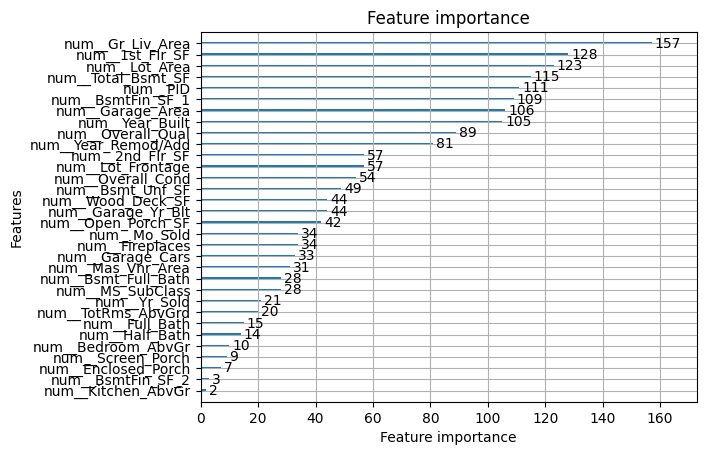

In [104]:
lgb.plot_importance(model)

## Train vs Тест

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

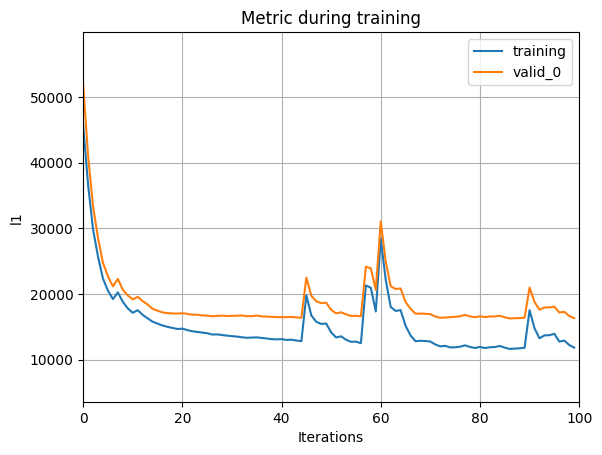

In [105]:
lgb.plot_metric(model,
                metric='l1')

# Збереження моделі

In [106]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsm...
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 LGBMRegressor(bagging_fraction=0.7963828378885816,
                               bagging_freq=7, boosting_type='dart',
                               feature_fraction=0.5074077030699815,
                               lambda_l1=8.116188093932824e-06,
                               lambda_l2=0.0002599137335945474,
                               learning_rate=0.26994245054896626,
                               min_child_samples=62, num_leaves=103,
                               verbose=-1))])

# Додатково(оптимізація по декільком метрикам)

Optuna дозволяє шукати гіперпараметри, які оптимізують не одну, а одразу декілька метрик.

Для цього потрібно внести дві зміни:
* objective повинна повертати список значень
* optuna.create_study потрібно вказати параметр directions зі списком напрямків для кожної метрики

In [107]:
def objective(trial):
  """
  Функція objective для Optuna, яка навчає модель LightGBMRegressor
  на тренувальному наборі даних та оцінює її на тестовому наборі.

  Args:
      trial (optuna.Trial): Об'єкт Optuna, що представляє один набір гіперпараметрів.

  Returns:
      float: Значення метрики оцінки (R2).
  """

  # 1. Визначення гіперпараметрів:

  params = {
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
  }

  # 2. Створення моделі LightGBMRegressor:

  model = lgb.LGBMRegressor(**params)

  # 3. Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # 4. Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)

  r2 = metrics.r2_score(y_val, y_pred)
  mae = metrics.mean_absolute_error(y_val, y_pred)
  rmse = metrics.mean_squared_error(y_val, y_pred) ** 0.5


  # 5. Повернення значення метрики:
  return r2, mae, rmse

In [108]:
study = optuna.create_study(directions=['maximize', 'minimize', 'minimize'])
study.optimize(objective, n_trials=100)

Після оптимізації замість параметру `best_params` буде `best_trials` зі списком найкращих наборів гіперпараметрів

In [109]:
len(study.best_trials)

4

In [110]:
data = pd.DataFrame([trial.values for trial in study.best_trials],
                    columns=['r2', 'mae', 'rmse'])

data

,r2,mae,rmse
0,0.922695,14286.634662,20506.800646
1,0.927598,14544.589342,19845.919226
2,0.922485,14196.950123,20534.730551
3,0.923146,14424.439715,20446.894037


In [111]:
best_params = study.best_trials[0].params

In [112]:
best_params

{'boosting_type': 'gbdt',
 'learning_rate': 0.05116281618167923,
 'lambda_l1': 0.01581355452204201,
 'lambda_l2': 0.00039201178264397805,
 'num_leaves': 202,
 'feature_fraction': 0.44049346126018535,
 'bagging_fraction': 0.9399408292988848,
 'bagging_freq': 4,
 'min_child_samples': 59}